# Preprocesing

## Getting the dataset and selecting the district to work with

### Finding the biggest difference beetwen # of households and # of non-households

In [19]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'DMA Property Count 2016_2017.csv'

# Define the column data types
dtypes = {0: int, 1: str, 2: int, 3: int}

# Read the CSV file into a pandas DataFrame
dataset = pd.read_csv(csv_file_path, header=None, dtype=dtypes, skiprows=1)

# remove the first row with the column names
dataset = dataset[dataset[3] == 6]

print(dataset.head(5), "\n")

print(dataset.shape, "\n")

# Variables
max_diff = 0
index = 0
DMA = 0
area = ""

# You can access the rows and values like this:
for i, row in dataset.iterrows():
    cur_diff = row[2] - row[3]  
    if  cur_diff > max_diff:
        max_diff = cur_diff
        index = i
        DMA = row[0]
        area = row[1]
   
print("The bigger difference is: ", max_diff, " in the row #", index + 1, 
      " from the DMA #", DMA, " in the area ", area) 


     0   1    2  3
0    9  E4    7  6
1   26  S1  442  6
2   30  N2  416  6
3  160  S4  543  6
4  218  W1  472  6 

(43, 4) 

The bigger difference is:  1403  in the row # 10  from the DMA # 512  in the area  E1


#### Trying wwith the DMA to postal sector dataset

In [20]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'DMA to Postal Sector.csv'

# Define the column data types
dtypes = {0: int, 1: str, 2: int, 3: int}

# Read the CSV file into a pandas DataFrame
dataset = pd.read_csv(csv_file_path, header=None, dtype=dtypes, skiprows=1)

# remove the first row with the column names
dataset = dataset[dataset[3] == 6]

print(dataset.head(5), "\n")

print(dataset.shape, "\n")

# Variables
max_diff = 0
index = 0
DMA = 0
area = ""

# You can access the rows and values like this:
for i, row in dataset.iterrows():
    cur_diff = row[2] - row[3]  
    if  cur_diff > max_diff:
        max_diff = cur_diff
        index = i
        DMA = row[0]
        area = row[1]
   
print("The bigger difference is: ", max_diff, " in the row #", index + 1, 
      " from the DMA #", DMA, " in the sector ", area) 

     0       1    2  3   4   5   6
0   25   HD9 2   29  6 NaN NaN NaN
1   65  BD17 5  846  6 NaN NaN NaN
2  155   S73 0  106  6 NaN NaN NaN
3  160   S12 2  543  6 NaN NaN NaN
4  204   LS3 1  158  6 NaN NaN NaN 

(88, 7) 

The bigger difference is:  1073  in the row # 49  from the DMA # 1177  in the sector  LS25 7


### Extracting a new dataset that only contains the data of the DMA with the biggest difference

In [21]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = 'E1 2016_2017.csv'

# Define the column data types
dtypes = {0: int, 1: str, 2: str, 3: float, 4: str}

# Read the CSV file into a pandas DataFrame, skipping the first row
raw_dataset = pd.read_csv(csv_file_path, header=None, skiprows=1, dtype=dtypes)

# remove the first row which contains the names of the columns
raw_dataset = raw_dataset.drop(0)

# Select the data for the DMA #512
DMA_512 = raw_dataset[raw_dataset[0] == 512]

# Reset the index
DMA_512 = DMA_512.reset_index(drop=True)

print(DMA_512.head(5), "\n")

print(DMA_512.shape)


     0           1         2      3  4
0  512  01/04/2016  00:00:00  2.144  V
1  512  01/04/2016  00:15:00  2.056  V
2  512  01/04/2016  00:30:00  1.944  V
3  512  01/04/2016  00:45:00  1.867  V
4  512  01/04/2016  01:00:00  1.867  V 

(35040, 5)


### Cleaning the new dataset

In [22]:
# Select only the valid Readings (V)
DMA_512 = DMA_512[DMA_512[4] == 'V']
DMA_512.drop(4, axis=1, inplace=True)

print(DMA_512.head(5), "\n")
print(DMA_512.shape)

     0           1         2      3
0  512  01/04/2016  00:00:00  2.144
1  512  01/04/2016  00:15:00  2.056
2  512  01/04/2016  00:30:00  1.944
3  512  01/04/2016  00:45:00  1.867
4  512  01/04/2016  01:00:00  1.867 

(35018, 4)


### Converting and combining the date information 

In [23]:
# Convert the date and time columns to datetime format
DMA_512[1] = pd.to_datetime(DMA_512[1], format='%d/%m/%Y')
DMA_512[2] = pd.to_datetime(DMA_512[2])

# Combine the date and time columns into a single datetime column
dtime_column = DMA_512[1].dt.date.astype(str) + ' ' + DMA_512[2].dt.time.astype(str)

# Creating a new dataset with the merge datetime column
DMA_Final = DMA_512
DMA_Final[1] = dtime_column
DMA_Final[1] = pd.to_datetime(DMA_Final[1])

# Remove the old time column
DMA_Final.drop(2, axis=1, inplace=True)

# Reordering the indexes     ****It doesn't function******
#DMA_Final = DMA_Final.reset_index(drop=True)
#DMA_Final = DMA_Final.reindex(columns=[0, 1, 2])

DMA_Final.columns = ['DMA', 'datetime', 'flow_value']

print(DMA_Final.head(5), "\n")

print(DMA_Final.shape)

   DMA            datetime  flow_value
0  512 2016-04-01 00:00:00       2.144
1  512 2016-04-01 00:15:00       2.056
2  512 2016-04-01 00:30:00       1.944
3  512 2016-04-01 00:45:00       1.867
4  512 2016-04-01 01:00:00       1.867 

(35018, 3)


## Looking for Patterns in the data

### Plotting

#### Separate for years

In [24]:
# Create a DateTimeIndex using the 'datetime' column
index = pd.DatetimeIndex(DMA_Final['datetime'])

# Create a list to hold the 12 datasets
yearly_datasets = []

# Iterate over each month and extract the corresponding dataset
for year in range(2016, 2018):
    # Filter the dataset based on the month
    yearly_data = DMA_Final[index.year == year]
    # Append the filtered dataset to the list
    yearly_datasets.append(yearly_data)

#### Separate for months

In [25]:
# Create a DateTimeIndex using the 'datetime' column
index2016 = pd.DatetimeIndex(yearly_datasets[0]['datetime'])
index2017 = pd.DatetimeIndex(yearly_datasets[1]['datetime'])

# Create a list to hold the 12 datasets
monthly_datasets_2016 = []
monthly_datasets_2017 = []

# Iterate over each month and extract the corresponding dataset
for year in range(2016,2018):
    
    for month in range(1, 13):    
        # Filter the dataset based on the month and year
        if year == 2016:
            monthly_data = yearly_datasets[0][index2016.month == month]
        else:
            monthly_data = yearly_datasets[1][index2017.month == month]

        # Append the filtered dataset to the list
        if year == 2016:
            monthly_datasets_2016.append(monthly_data)
        else:
            monthly_datasets_2017.append(monthly_data)


#### Plotting in line chart

##### Period of days

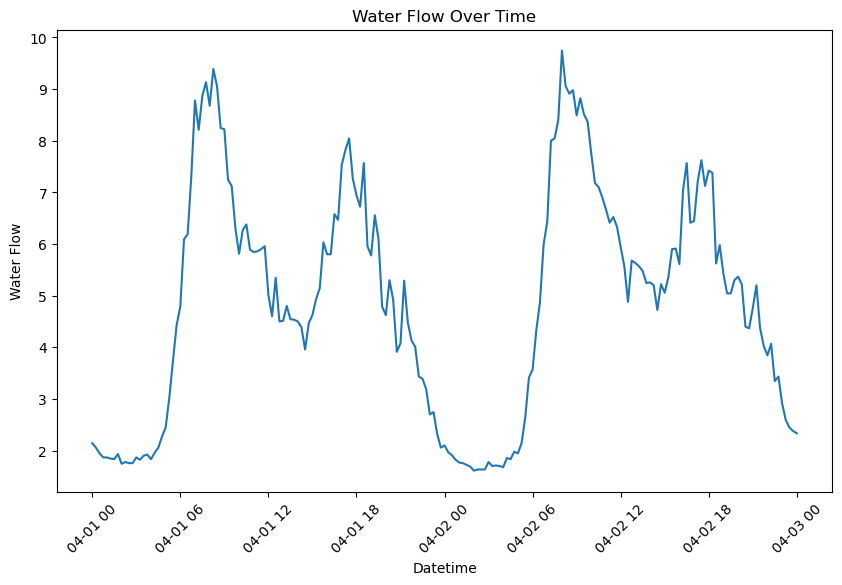

In [26]:
import matplotlib.pyplot as plt

# Define the range of time to show

# Startdate
start_hour = 0
start_minute = 0
start_day = 1
start_month = 4

start_date = pd.Timestamp(year=2016, 
                         month=start_month, 
                         day=start_day, 
                         hour=start_hour, 
                         minute=start_minute, 
                         second=0)

# Enddate
end_hour = 0
end_minute = 0
end_day = 3
end_month = 4

end_date = pd.Timestamp(year=2016, 
                       month=end_month, 
                       day=end_day, 
                       hour=end_hour, 
                       minute=end_minute, 
                       second=0)

# Filter the dataset based on the specified date range
filtered_data = monthly_datasets_2016[3][(monthly_datasets_2016[3]['datetime'] >= start_date) 
                                         & (monthly_datasets_2016[3]['datetime'] <= end_date)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['datetime'], filtered_data['flow_value'])
#plt.plot(monthly_datasets_2016[4]['datetime'], monthly_datasets_2016[4]['flow_value'])
plt.xlabel('Datetime')
plt.ylabel('Water Flow')
plt.title('Water Flow Over Time')

plt.xticks(rotation=45)
plt.show()


##### Period of Hours

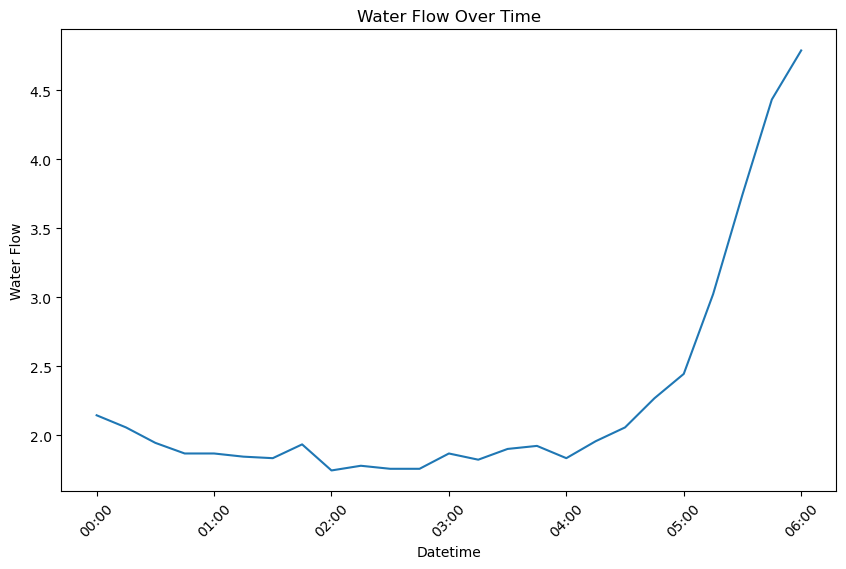

In [27]:
import matplotlib.dates as mdates

# Define the range of time to show

# Startdate
start_hour = 0
start_minute = 0
start_day = 1
start_month = 4

startdate = pd.Timestamp(year=2016, 
                         month=start_month, 
                         day=start_day, 
                         hour=start_hour, 
                         minute=start_minute, 
                         second=0)

# Enddate
end_hour = 6
end_minute = 0
end_day = 1
end_month = 4

enddate = pd.Timestamp(year=2016, 
                       month=end_month, 
                       day=end_day, 
                       hour=end_hour, 
                       minute=end_minute, 
                       second=0)

# Filter the dataset based on the specified date range
filtered_data = monthly_datasets_2016[3][(monthly_datasets_2016[3]['datetime'] >= startdate) 
                                         & (monthly_datasets_2016[3]['datetime'] <= enddate)]

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['datetime'], filtered_data['flow_value'])
plt.xlabel('Datetime')
plt.ylabel('Water Flow')
plt.title('Water Flow Over Time')

# Format x-axis tick labels to show hours only
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

plt.xticks(rotation=45)
plt.show()


### Taking the Night Interval (12:00AM to 05:00AM)

In [39]:
Night_data = DMA_Final[(DMA_Final['datetime'].dt.hour >= 0) 
                       & (DMA_Final['datetime'].dt.hour <= 5)]

print(Night_data.head(5), "\n")

print(Night_data.shape)

   DMA            datetime  flow_value
0  512 2016-04-01 00:00:00       2.144
1  512 2016-04-01 00:15:00       2.056
2  512 2016-04-01 00:30:00       1.944
3  512 2016-04-01 00:45:00       1.867
4  512 2016-04-01 01:00:00       1.867 

(8740, 3)


#### Looking for the extreme values

In [56]:
# Max Flow
max_flow = Night_data['flow_value'].max()
max_row = Night_data.loc[Night_data['flow_value'] == max_flow]

print(f"The max water flow with value: {max_flow:.2f} \
was detected the day {(max_row['datetime'].dt.day.item())}\
-{max_row['datetime'].dt.month.item()}\
-{max_row['datetime'].dt.year.item()} \n")


# Min Flow
min_flow = Night_data['flow_value'].min()
min_row = Night_data.loc[Night_data['flow_value'] == min_flow]

print(f"The min water flow with value: {min_flow:.2f} \
was detected the day {(min_row['datetime'].dt.day.item())}\
-{min_row['datetime'].dt.month.item()}\
-{min_row['datetime'].dt.year.item()} \n")


# Mean Flow
mean_flow = Night_data['flow_value'].mean()

print(f"The mean flow is: {mean_flow:.2f} \n")


The max water flow with value: 7.04 was detected the day 6-7-2016 

The min water flow with value: 0.02 was detected the day 29-6-2016 

The mean flow is: 2.54 

